In [45]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import pandas as pd

In [46]:
data = pd.read_csv("VLagun_Total_Years4.csv")
X = data.iloc[:,0:57]
Y = data.iloc[:,:58]
features_names = data.columns
data.head()

,PSU,O2,temp.,SS,SRP,DOP,PP,NH4N,NO3N,DON,...,Keratella cochlearis cochlearis,Keratella cochlearis f.tecta,Keratella quadrata,Polyarthra vulgaris,Polyarthra platyptera,Pompholyx sp.,Synchaeta sp.,Trichocerca pusilla,Trichocerca similis,Years
0,3.757624,9.46,18.3,52.0,3.5,11.7,185.0,0.039,0.022,0.551,...,0.8920,0.2714,0.0000,0.0313,0.0,0.0000,0.0000,0.0045,0.0009,0
1,3.504707,9.89,19.1,50.0,4.4,17.5,111.3,0.020,0.025,0.123,...,0.0640,0.0464,0.0000,0.0111,0.0,0.0000,0.0437,0.0041,0.0020,0
2,3.757624,9.66,18.1,59.0,3.2,22.8,103.4,0.016,0.008,0.582,...,0.0270,0.0186,0.0000,0.0000,0.0,0.0000,0.0000,0.0028,0.0027,0
3,3.107266,10.36,19.5,46.0,4.3,22.3,92.7,0.026,0.021,0.693,...,0.3306,0.2084,0.0000,0.0000,0.0,0.0167,0.0000,0.0099,0.0103,0
4,2.619498,11.56,19.0,42.0,11.7,30.3,73.2,0.022,0.048,0.383,...,0.1502,0.1343,0.0159,0.0000,0.0,0.0058,0.0000,0.0112,0.0021,0


In [47]:
data.shape

(120, 58)

In [48]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [49]:
rf = RandomForestRegressor(n_estimators= 100, random_state=42)

rf.fit(X,Y)

importances = rf.feature_importances_

for feature, importance in zip(X.columns, importances):
  np.argsort(importance)
  print(feature, importance)

PSU 0.008994892039225072
O2 0.004810963815798398
temp. 0.006806099621088019
SS 0.16811113222943014
SRP 0.01849951223842598
DOP 0.0458826480741208
PP 0.6029490842559485
NH4N 0.0035337278325712185
NO3N 0.006667984662987061
DON 0.0028535832066537907
PN 0.005889735294151472
TN/TP 0.0033396794219635083
Fe 0.004117756425938566
SiO4Si 0.00458634699540997
DOC 0.0038022680964340783
TPOC 0.010933634845950049
Windspeedinsitu 0.003398439021098039
Depth 0.0036035366308588336
DINtoDIP 0.012111707926258486
Cyanobacteria 0.004620399602845573
Chlorophyceae 0.005715654493440271
Euglenophyceae 0.004890987306345955
Diatomophyceae 0.008796788517321706
Flagellata    0.0036518262498714343
Dinoflagellata  0.002592076958834758
Cryptophytes 0.0012627721719189924
picophytoplankton 0.005400253584060433
Bosmina longirostris 4.718121420713793e-05
Ceriodaphnia sp. 9.759171046900254e-05
Diaphanosoma brachyurum  0.0025320611047958256
Leptodora kindtii 2.80775748671486e-05
Acartia longiremis 0.0014683375440903037
Acart

In [50]:
importances = list(rf.feature_importances_)

feature_importances = [(feature, round(importance,3)) for feature, importance in zip(X, importances)]

feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

[print(f'Variable:{pair[0]:31} Importance: {pair[1]}') for pair in feature_importances];

Variable:PP                              Importance: 0.603
Variable:SS                              Importance: 0.168
Variable:DOP                             Importance: 0.046
Variable:SRP                             Importance: 0.018
Variable:DINtoDIP                        Importance: 0.012
Variable:TPOC                            Importance: 0.011
Variable:PSU                             Importance: 0.009
Variable:Diatomophyceae                  Importance: 0.009
Variable:temp.                           Importance: 0.007
Variable:NO3N                            Importance: 0.007
Variable:PN                              Importance: 0.006
Variable:Chlorophyceae                   Importance: 0.006
Variable:O2                              Importance: 0.005
Variable:SiO4Si                          Importance: 0.005
Variable:Cyanobacteria                   Importance: 0.005
Variable:Euglenophyceae                  Importance: 0.005
Variable:picophytoplankton               Importance: 0.0

In [51]:
%matplotlib inline

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection, preprocessing, tree, metrics

In [52]:
estimator_rf = RandomForestRegressor(
    n_jobs=1,
    n_estimators=100,
    random_state=42)

In [53]:
estimator_rf.fit(X,Y)

RandomForestRegressor(n_jobs=1, random_state=42)

In [54]:
feature_importance_df = pd.DataFrame(estimator_rf.feature_importances_, index= X.columns.values, columns=["Importance"])
feature_importance_df

,Importance
PSU,0.008995
O2,0.004811
temp.,0.006806
SS,0.168111
SRP,0.018500
DOP,0.045883
PP,0.602949
NH4N,0.003534
NO3N,0.006668
DON,0.002854


In [55]:
feature_importance_df.sort_values(by="Importance", inplace=True, ascending= False)

<Axes: >

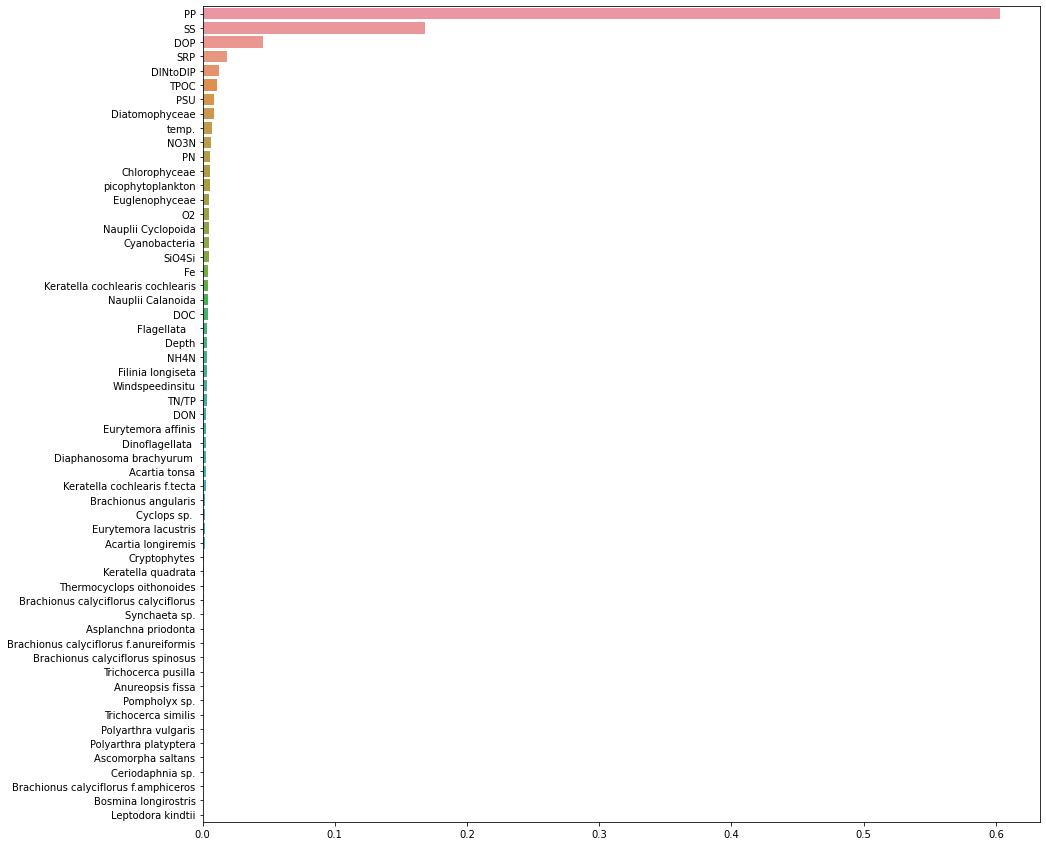

In [56]:
plt.figure(figsize =(15,15))
sns.barplot(data=feature_importance_df, x=feature_importance_df.values.flatten(), y= feature_importance_df.index.values)

In [57]:
%%shell
jupyter nbconvert --to html ///content/Random_forest_big_data.ipynb

[NbConvertApp] Converting notebook ///content/Random_forest_big_data.ipynb to html
[NbConvertApp] Writing 687647 bytes to /content/Random_forest_big_data.html
